In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
%matplotlib inline
# plt.switch_backend('agg')

In [3]:
folder='/Users/vuh6/Desktop/mount_ros/source/hector_transferChromState/simulation_model_design/experiments/strict_genData_realScen/b600_e1000'
fn_list = glob.glob(folder + '/*.txt')
df_list = list(map(lambda x: pd.read_csv(x, header = 0, index_col = None, sep = '\t'), fn_list))
df = pd.concat(df_list)

In [4]:
df

,model,num_signals,num_references,num_states,hidden,dropout,ratio_m_CR,ratio_r_CR
0,SigOnly,3,15,8,32,0.2,0.814967,0.000000
1,SigBeta,3,15,8,32,0.2,0.995967,0.000000
2,SigRef,3,15,8,32,0.2,0.964933,0.947527
3,SigRefBeta,3,15,8,32,0.2,0.975300,0.937727


<AxesSubplot:xlabel='num_states', ylabel='ratio_m_CR'>

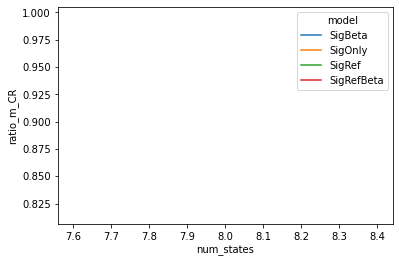

In [5]:
t1 = df.groupby(['model', 'num_states'])['ratio_m_CR'].mean().reset_index()
sns.lineplot(data = t1, x = 'num_states', y = 'ratio_m_CR', hue = 'model')

<AxesSubplot:xlabel='num_references', ylabel='ratio_m_CR'>

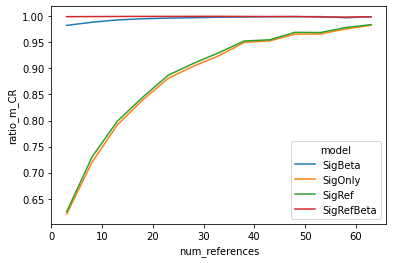

In [6]:
t2 = df.groupby(['model', 'num_references'])['ratio_m_CR'].mean().reset_index()
sns.lineplot(data = t2, x = 'num_references', y = 'ratio_m_CR', hue = 'model')

## Why does the latent space appear uniform right now?

- Because the autoencoder ended up learning to maximize the likelihood of observed data, and not taking into 
account minimizing the difference between the prior of $z$ ($p(z)$) and the variational of $z$ ($q(z|x)$)
- For each reference epigenome, generate data such that there are variations across states. (1/2 positions from state0, other half state1. Each state has one signal patterns. --> in that case, the model may not work if it cannot recognize that it needs a latent variable. 

## Checking the effects of dimension of input data into the latent space representation
A brief reading: http://ruishu.io/2017/01/14/one-bit/
In this section, we will test how changing the number of signal tracks, and the number of reference epigenomes, can change the distribution of posterior probabilities of state assignments

In [6]:
# the 4 models have been run on rosalind given different settings of num_signals, num_references, etc.
output_folder = '/Users/vuh6/Desktop/mount_ros/source/hector_transferChromState/simulation_model_design/experiments/strict_genData_realScen/counts/'
small_folder=os.path.join(output_folder,'bins10000_b600_e4000')
truth_fn = os.path.join(small_folder,'collapsed_theta.txt.gz')
sigOnly_fn = os.path.join(small_folder, 'SigOnly_pos.txt.gz')
sigBeta_fn = os.path.join(small_folder, 'SigBeta_pos.txt.gz')
sigRefBeta_fn = os.path.join(small_folder, 'SigRefBeta_c_pos.txt.gz')
sigRef_fn = os.path.join(small_folder, 'SigRef_c_pos.txt.gz')

In [15]:
def read_state_df(fn, model_name):
    df = pd.read_csv(fn, header = 0, index_col = None, sep = '\t')
    df['max_prob'] = df.apply(lambda x: np.max(x[:-1]), axis = 1)
    df.columns = list(map(lambda x: '{}|{}'.format(model_name, x), df.columns))
    return df
truth_df = read_state_df(truth_fn, 'truth')
# sigOnly_df = read_state_df(sigOnly_fn, 'sigOnly')
# sigBeta_df = read_state_df(sigBeta_fn, 'sigBeta')
sigRefBeta_df = read_state_df(sigRefBeta_fn, 'sigRefBetaC')
sigRef_df = read_state_df(sigRef_fn, 'sigRefC')
all_df = pd.concat([truth_df, sigOnly_df, sigBeta_df, sigRefBeta_df, sigRef_df], axis = 1)

In [16]:
all_df.head(30)

,truth|0,truth|1,truth|2,truth|3,truth|4,truth|5,truth|6,truth|7,truth|max_state,truth|max_prob,...,sigRefC|0,sigRefC|1,sigRefC|2,sigRefC|3,sigRefC|4,sigRefC|5,sigRefC|6,sigRefC|7,sigRefC|max_state,sigRefC|max_prob
0,0.0,0.007348,0.0,0.0,0.0,0.992652,0.0,0.0,5,0.992652,...,0.041853,0.259566,0.152524,0.144057,0.145264,0.046899,0.067774,0.142063,1,0.259566
1,0.0,0.035633,0.0,0.0,0.0,0.964367,0.0,0.0,5,0.964367,...,0.039883,0.234729,0.156085,0.147340,0.148443,0.042909,0.085392,0.145220,1,0.234729
2,0.0,0.059236,0.0,0.0,0.0,0.940764,0.0,0.0,5,0.940764,...,0.096871,0.352558,0.082752,0.083708,0.084788,0.120391,0.095456,0.083476,1,0.352558
3,0.0,0.026443,0.0,0.0,0.0,0.973557,0.0,0.0,5,0.973557,...,0.052982,0.188633,0.161304,0.153261,0.153999,0.054989,0.083151,0.151681,1,0.188633
4,0.0,0.054033,0.0,0.0,0.0,0.945967,0.0,0.0,5,0.945967,...,0.098527,0.353832,0.081403,0.082320,0.083328,0.122612,0.096198,0.081780,1,0.353832
5,0.0,0.084336,0.0,0.0,0.0,0.915664,0.0,0.0,5,0.915664,...,0.048643,0.231782,0.156889,0.147620,0.149235,0.053960,0.065165,0.146705,1,0.231782
6,0.0,0.053111,0.0,0.0,0.0,0.946889,0.0,0.0,5,0.946889,...,0.044539,0.211432,0.159213,0.150635,0.151593,0.048180,0.085741,0.148666,1,0.211432
7,0.0,0.049834,0.0,0.0,0.0,0.950166,0.0,0.0,5,0.950166,...,0.044804,0.212625,0.157612,0.150381,0.150649,0.049726,0.086572,0.147632,1,0.212625
8,0.0,0.021215,0.0,0.0,0.0,0.978785,0.0,0.0,5,0.978785,...,0.038835,0.224894,0.155881,0.147569,0.148921,0.052300,0.086282,0.145318,1,0.224894
9,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1.000000,...,0.136818,0.045700,0.083948,0.082117,0.081364,0.411673,0.074810,0.083570,5,0.411673


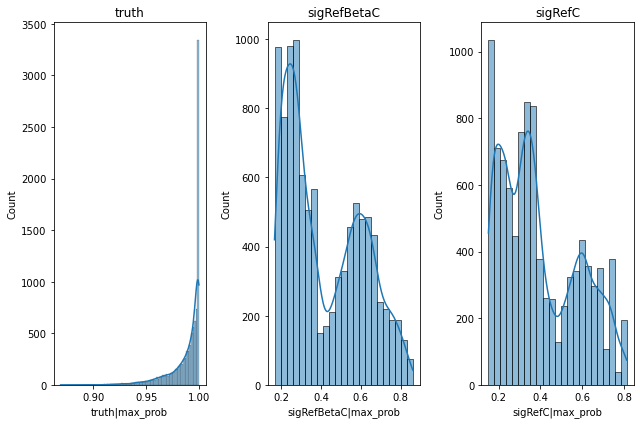

In [18]:
# draw the histogram of entropy for the different models
model_name_list = ['truth', 'sigRefBetaC', 'sigRefC', 'sigOnly', 'sigBeta']
plot_nrow = 1
plot_ncol = 3
fig, axes = plt.subplots(ncols = plot_ncol, nrows = plot_nrow, figsize = (9,6))
for model_index, model_name in enumerate(model_name_list[:3]):
    ax = (axes.flat)[model_index] 
    sns.histplot(all_df['{}|max_prob'.format(model_name)], kde= True, ax = ax).set_title(model_name)
fig.tight_layout()
plt.show()

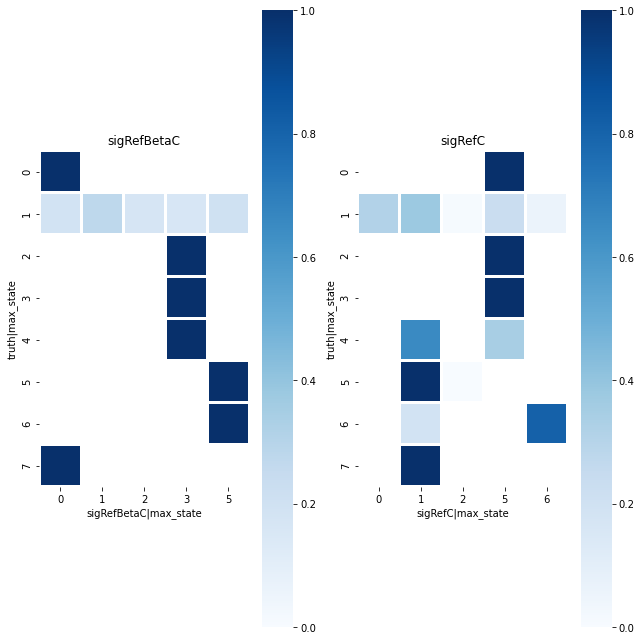

In [12]:
model_name_list = ['truth', 'sigOnly', 'sigBeta', 'sigRefBetaC', 'sigRefC']
# draw the confusion matrix
state_df = all_df.filter(regex='max_state',axis=1)
# select columns ending with 'max_state'
plot_nrow = 1
plot_ncol = 2
fig, axes = plt.subplots(ncols = plot_ncol, nrows = plot_nrow, figsize = (9,9))
for model_index, model_name in enumerate(model_name_list[3:]):
    colnames = ['truth|max_state', '{}|max_state'.format(model_name)]
    df = state_df[colnames]
    df = df.groupby(colnames).size().to_frame(name = 'size').reset_index()
    df = df.pivot(colnames[0], colnames[1], 'size')
    df = df.div(df.sum(axis = 1), axis = 0) # row normalize
    ax = (axes.flat)[model_index] 
    sns.heatmap(df, cbar=True, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', ax=ax).set_title(model_name)
fig.tight_layout()
plt.show()

In [10]:
df = state_df.groupby(['truth|max_state', 'sigOnly|max_state']).size().to_frame(name='size').reset_index()

In [23]:
t = df.pivot('truth|max_state', 'sigOnly|max_state', 'size')
t = t.div(t.sum(axis = 1), axis = 0)
t

sigOnly|max_state,0,1,2
truth|max_state,,,
0,0.802030,0.037026,0.160944
1,0.811282,0.038393,0.150325
2,0.800000,0.032159,0.167841


<AxesSubplot:xlabel='sigOnly|max_state', ylabel='truth|max_state'>

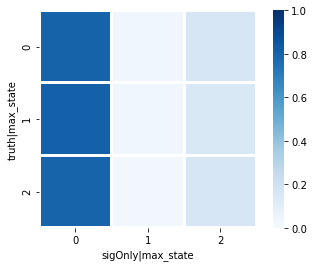

In [25]:

for model_index, model_name in enumerate(model_name_list[1:]):
    df = state_df.groupby(['truth|max_state', '{}|max'])
sns.heatmap(t, cbar=True, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

In [41]:
state_df

,truth|max_state,sigOnly|max_state,sigBeta|max_state,sigRefBeta|max_state,sigRef|max_state
0,0,0,0,0,1
1,2,0,2,2,0
2,1,0,1,1,0
3,2,0,2,2,0
4,1,0,1,1,1


In [6]:
def read_one_auc_fn(fn):
    context = fn.split('/')[-1].split('auc_')[1].split('.txt')[0]
    df = pd.read_csv(fn, header = None, sep = '\t', index_col = 0)
    df.columns = [context]
    return df

In [9]:
import glob
import os
import pandas as pd
import numpy as np
auc_folder = '/Users/vuh6/Desktop/mount_ros/model_analysis/K562_hg19/compare_models_recover_crispr_mpra/state_spec_segmentation/fg_against_bg'
fn_list = glob.glob(auc_folder + '/auc*')
df_list = list(map(read_one_auc_fn, fn_list))

AxesSubplot(0.125,0.125;0.775x0.755)


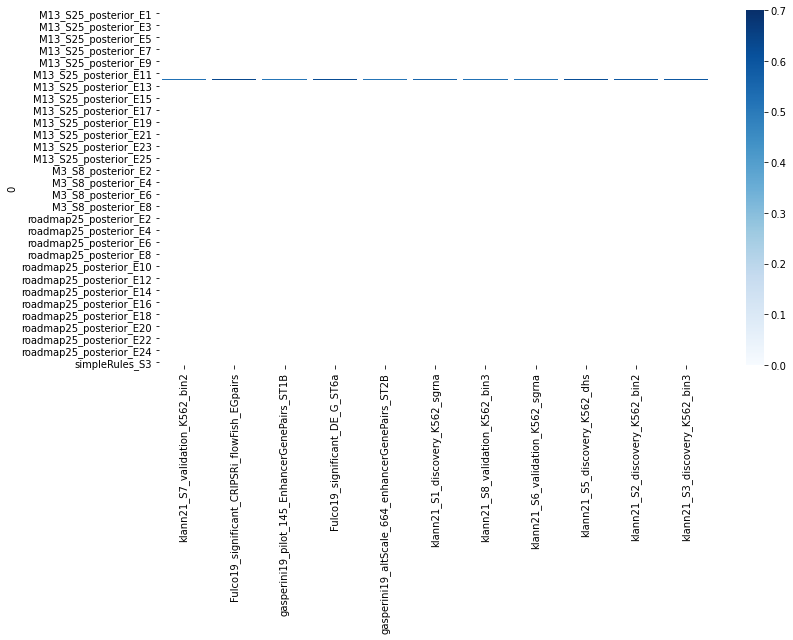

In [22]:
all_df = pd.concat(df_list, axis = 1)
all_df.to_csv(auc_folder + '/all_models_auc.txt', header = True, index = True, sep = '\t')
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (12,9))
print(axes)
sns.heatmap(all_df,ax = axes, cbar=True, linewidths=5,vmax=0.7, vmin=0, square=False, cmap='Blues')
fig.tight_layout()
plt.show()

In [11]:
all_df

,klann21_S7_validation_K562_bin2,Fulco19_significant_CRIPSRi_flowFish_EGpairs,gasperini19_pilot_145_EnhancerGenePairs_ST1B,Fulco19_significant_DE_G_ST6a,gasperini19_altScale_664_enhancerGenePairs_ST2B,klann21_S1_discovery_K562_sgrna,klann21_S8_validation_K562_bin3,klann21_S6_validation_K562_sgrna,klann21_S5_discovery_K562_dhs,klann21_S2_discovery_K562_bin2,klann21_S3_discovery_K562_bin3
0,,,,,,,,,,,
M13_S25_posterior_E1,0.486543,0.357187,0.486468,0.376376,0.444291,0.446506,0.483408,0.492813,0.385993,0.429013,0.424748
M13_S25_posterior_E2,0.472402,0.441695,0.461004,0.499719,0.492170,0.455370,0.474403,0.472876,0.434284,0.445233,0.440801
M13_S25_posterior_E3,0.477686,0.353891,0.456916,0.373671,0.430564,0.441881,0.477586,0.482522,0.381160,0.421324,0.417473
M13_S25_posterior_E4,0.471588,0.398494,0.425582,0.472860,0.416666,0.454146,0.472257,0.471896,0.430092,0.445679,0.438422
M13_S25_posterior_E5,0.500022,0.381456,0.482470,0.397736,0.445259,0.465259,0.498083,0.502727,0.414464,0.449252,0.443078
M13_S25_posterior_E6,0.487941,0.460530,0.452438,0.477868,0.460369,0.479606,0.489010,0.486394,0.468551,0.464025,0.460181
M13_S25_posterior_E7,0.473645,0.336185,0.459429,0.388869,0.419493,0.437494,0.470909,0.481838,0.363450,0.407438,0.400753
M13_S25_posterior_E8,0.487622,0.517808,0.555969,0.577017,0.580160,0.472594,0.489218,0.484336,0.482780,0.463351,0.465085
M13_S25_posterior_E9,0.506230,0.548293,0.584795,0.555438,0.588428,0.562680,0.506401,0.503310,0.636383,0.598313,0.608443
